# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [37]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [38]:
# read the data
df = pd.read_csv('C://Users//benan//Downloads//foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

* The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.
* Restaurent contains the name of the restaurant.
* Cuisine_type coloumn contains the type of he cuisine.
* food_preparation_time and delivery_time contains the time needed for food preparation and delivery time.
* rating coloumn contains the rating information, some are given and some not given

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here
df.shape

(1898, 9)

#### Observations:


The DataFrame has 1898 rows and 9 coloumns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:  


   * The Dataframe has (int,float,object) datatypes.
   * The Dataframe has 4 integer, 1 float and  4 object data type.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

### Observations:


    There is no missing values in this data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Write your code here
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:


   * Minimum time for food to be prepared is 20 mins.      
   * Average time for food to be prepared is 27.37 mins.  
   * Maximum time for food to be prepared is 35 mins.

### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# Write the code here
df.rating.value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

### Observations:  
     

* 736 orders are not rated.  
* 39% orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [4]:
# Write the code here
df['order_id'].nunique()

1898

#### Observation:  
  Number of unique order_id is 1898.

In [5]:
df['customer_id'].unique()

array([337525, 358141,  66393, ...,  97838, 292602, 397537], dtype=int64)

In [6]:
df['customer_id'].nunique()

1200

#### Observation:  
   There are 1200 unique customer_id in dataframe.

In [7]:
df['restaurant_name'].nunique()

178

#### Observation:  
  The data has 178 unique restaurant names.

In [8]:
df['cuisine_type'].nunique()

14

#### Observation:
  The data frame has 14 unique cuisine type.

### Observation on cost of the order

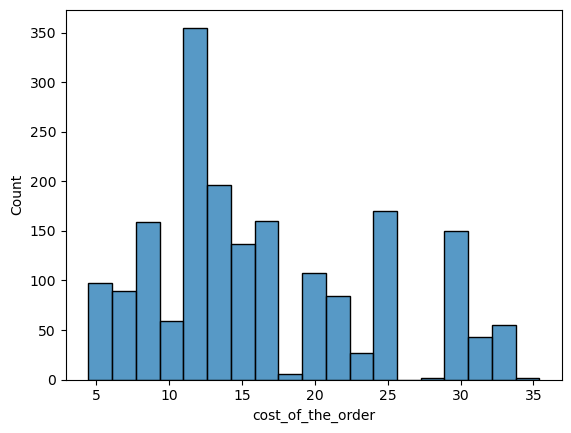

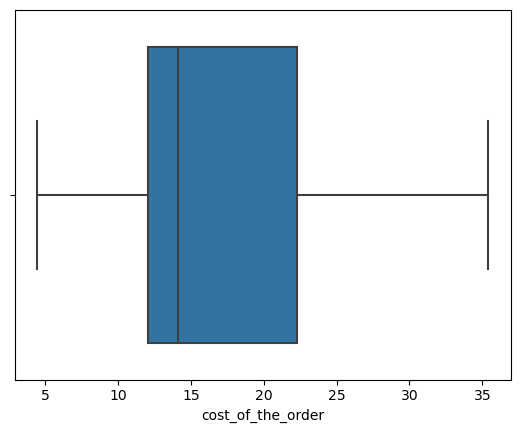

In [10]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') 
plt.show() 

#### Observation:
  * Orders are between around 4 to around 37 dollars.
  * There is no outliers.
  * The distribution of cost of order is slightly right skewed.

In [11]:
df['day_of_the_week'].unique()
df['day_of']

array(['Weekend', 'Weekday'], dtype=object)

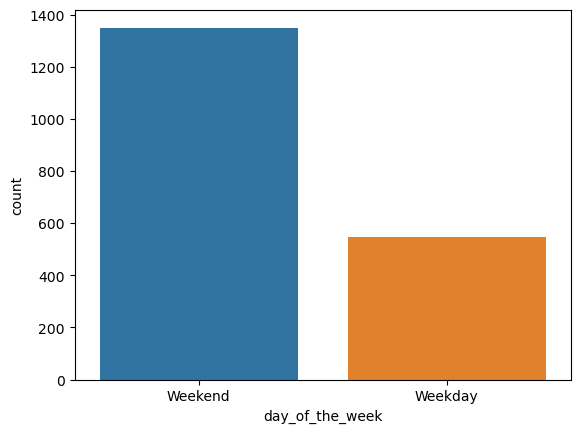

In [36]:
sns.countplot(data=df,x='day_of_the_week') 
plt.show()

### Observation:
 
 * More orders are on weekends rather than weekdays.
 * Weekend orders are more than double of weekdays orders.
 

In [12]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

### Observation on food preparation time 

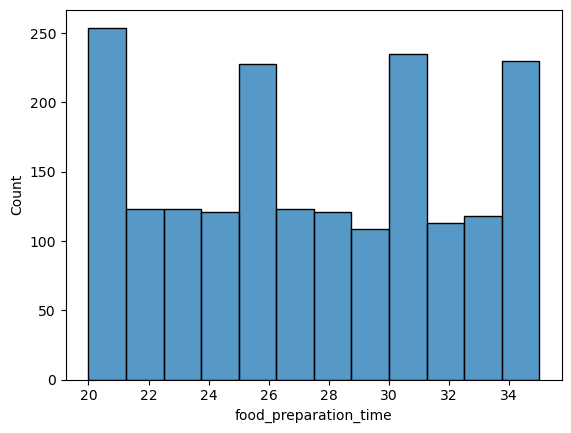

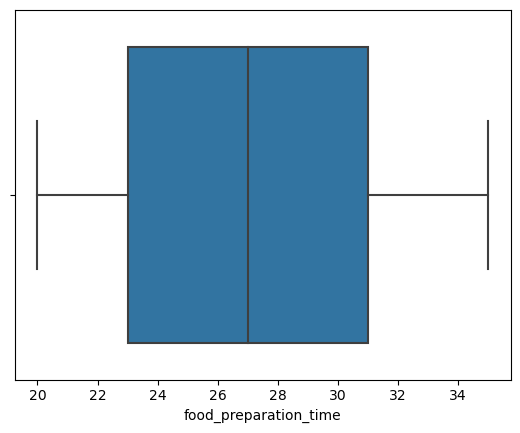

In [13]:
sns.histplot(data=df,x='food_preparation_time') 
plt.show()
sns.boxplot(data=df,x='food_preparation_time') 
plt.show()

Observation:

  * There are no outliers.
  

### Observations on delivery time 

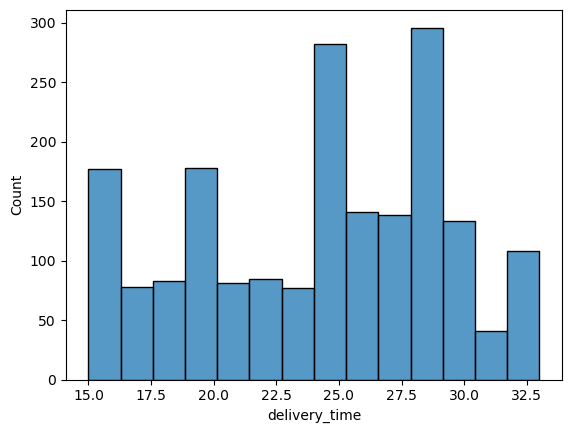

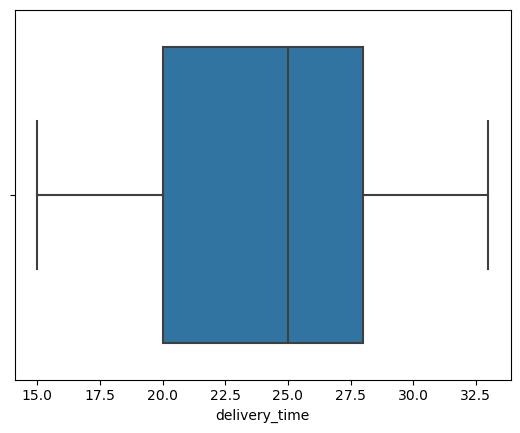

In [14]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time') 
plt.show()

#### Observation:
  * Delivery time is slighly left skewed.  
  * There is no outliers.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [16]:
# Write the code here
# Find the top 5 restaurents
df['restaurant_name'].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

 Observations:  
    Shake Shack restaurant received highest order, followed by The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm 

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [20]:
# Write the code here
# Query for the weekend.
df_weekend=df[df['day_of_the_week']=='Weekend']
# Weekend sale count
df_weekend['cuisine_type'].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

### Observation:  
   * American cuisine is the most popular cuisine on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [22]:
# Write the code here
#Query the orders which has cost greater than 20$
df_greater_than_20 = df[df['cost_of_the_order']>20]
print('The number of total orders that cost above 20 dollars is:' ,df_greater_than_20.shape[0])
#Percentage of the cost which has greater than 20$
percentage = (df_greater_than_20.shape[0]/ df.shape[0]) * 100
print('Percentage above 20 dollars is: ',round(percentage, 2),'%')

The number of total orders that cost above 20 dollars is: 555
Percentage above 20 dollars is:  29.24 %


### **Question 10**: What is the mean order delivery time? [1 mark]

In [62]:
# Write the code here
df_mean_del_time = df['delivery_time'].mean()
print('The mean delivery time for dataset is ',round(df_mean_del_time),'minutes')

The mean delivery time for dataset is  24 minutes


#### Observation:  
   * The mean delivery time of weekdays and weekend is 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [25]:
# Write the code here
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

### Observation
* 13 count is the highest order followed by 10 and 9.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Cost of the order vs Cuisine type

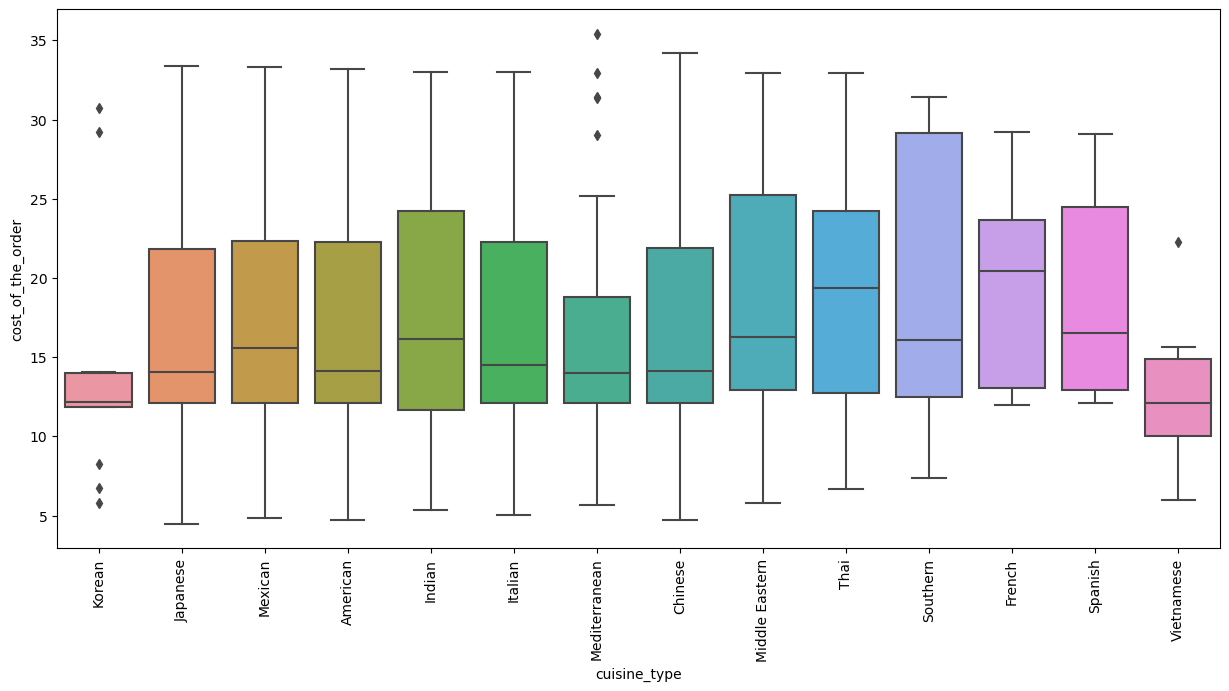

In [71]:
# Write the code here
plt.figure(figsize=(15,7))
sns.boxplot(x="cuisine_type", y="cost_of_the_order", data=df)
plt.xticks(rotation=90)
plt.show()

#### Observation
* There are outliers for Korean, Mediterranean and Vietnamese.

#### Food preparation time vs Cuisine type

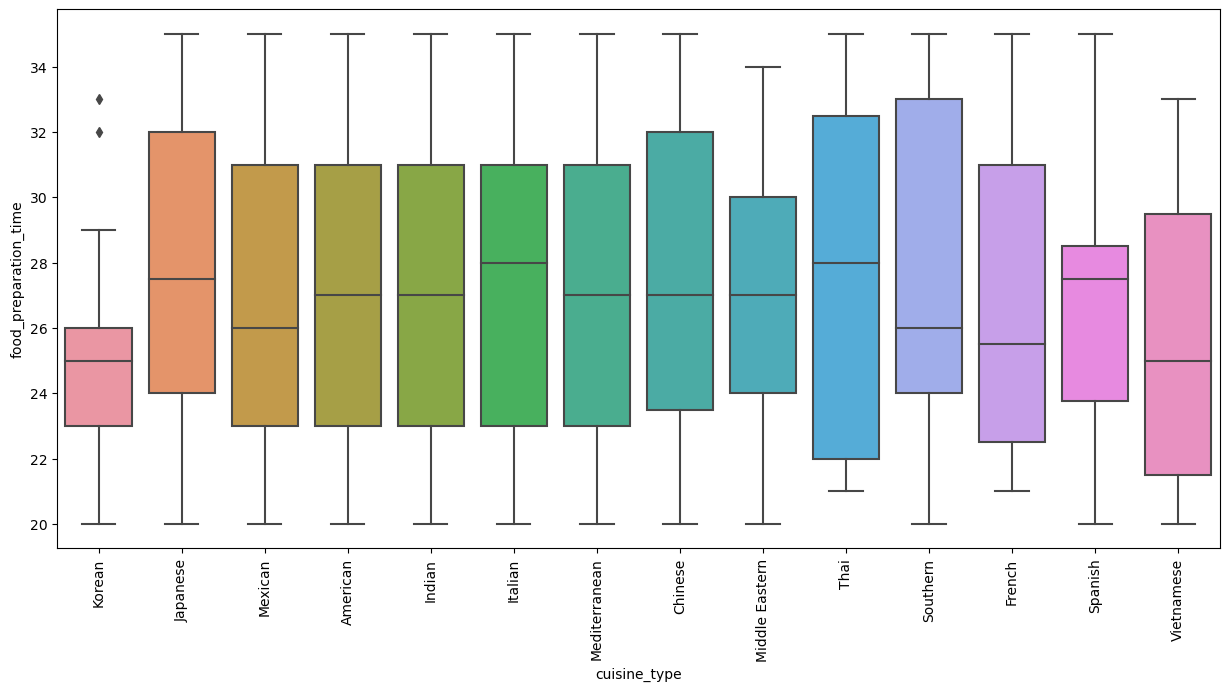

In [42]:
plt.figure(figsize=(15,7))
#plot the graph for cuisine type and food prepartion time
sns.boxplot(x="cuisine_type", y="food_preparation_time", data=df)
plt.xticks(rotation=90)
plt.show()

#### Delivery time vs Cuisine type

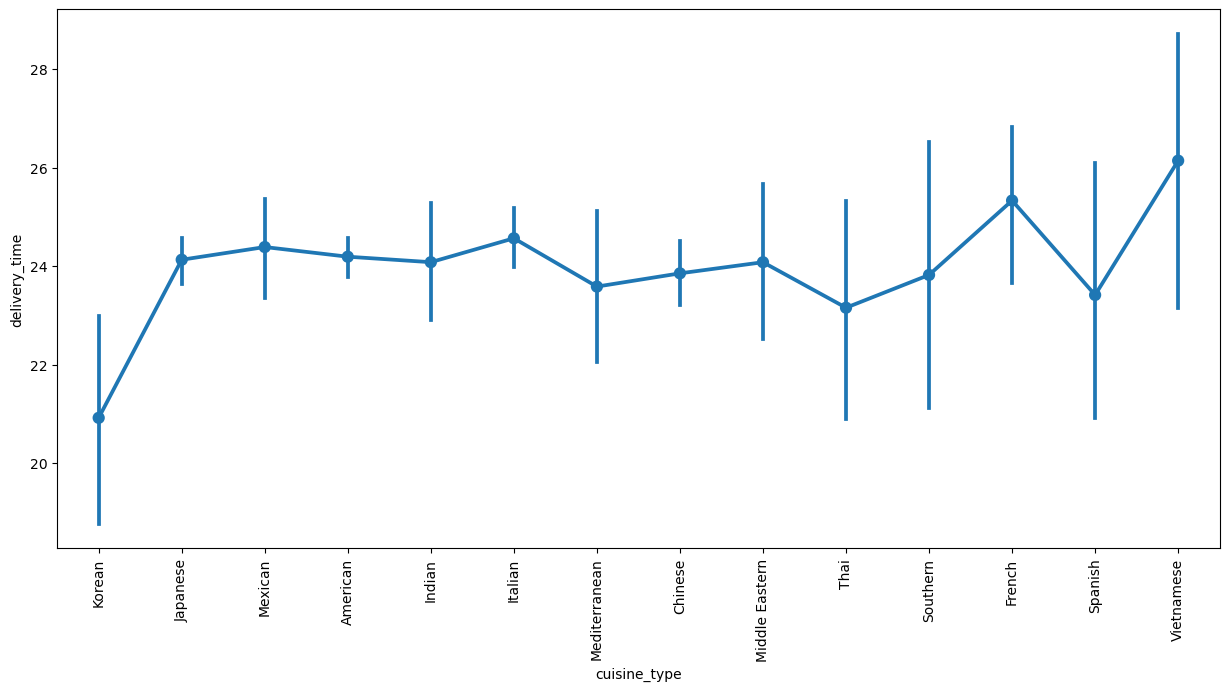

In [77]:
plt.figure(figsize=(15,7))
# plot the graph for cuisine type and delivery time
sns.pointplot(x="cuisine_type", y="delivery_time", data=df)
plt.xticks(rotation=90)
plt.show()

#### Day of the week vs Delivery time

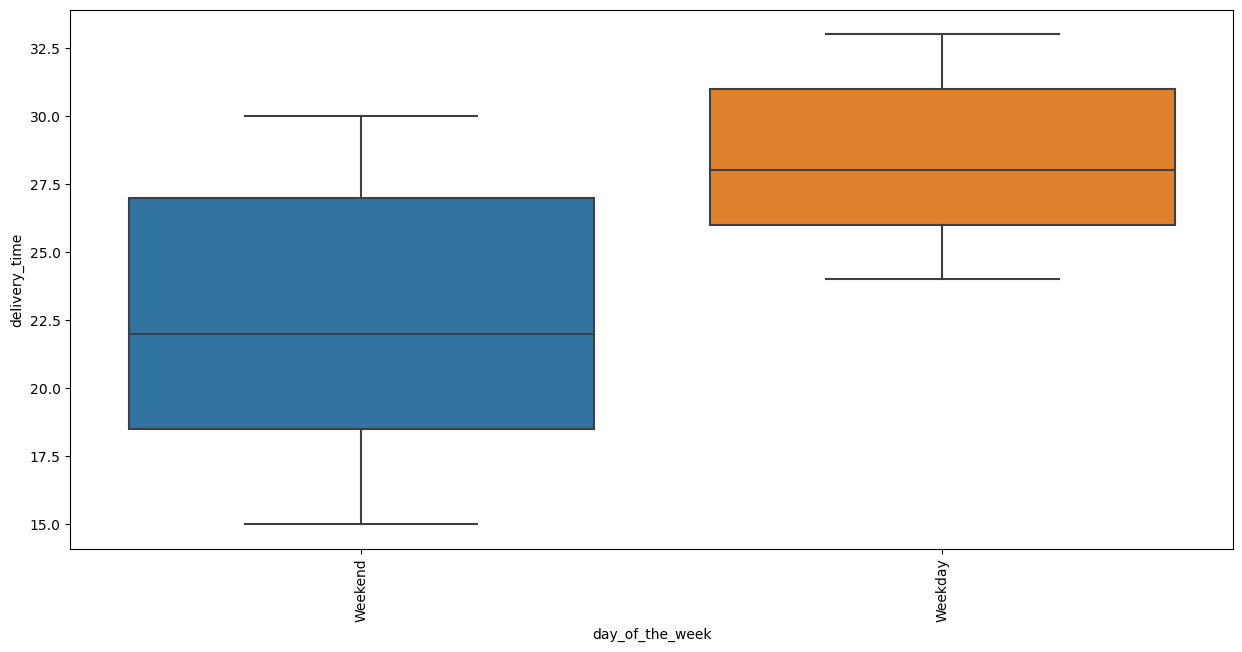

In [43]:
plt.figure(figsize=(15,7))
# plot the graph for day of the week and delivery time
sns.boxplot(x="day_of_the_week", y="delivery_time", data=df)
plt.xticks(rotation=90)
plt.show()

#### Observation:
 Delivery time on weekdays is higher than weekends.

#### Rating vs Food preparation time

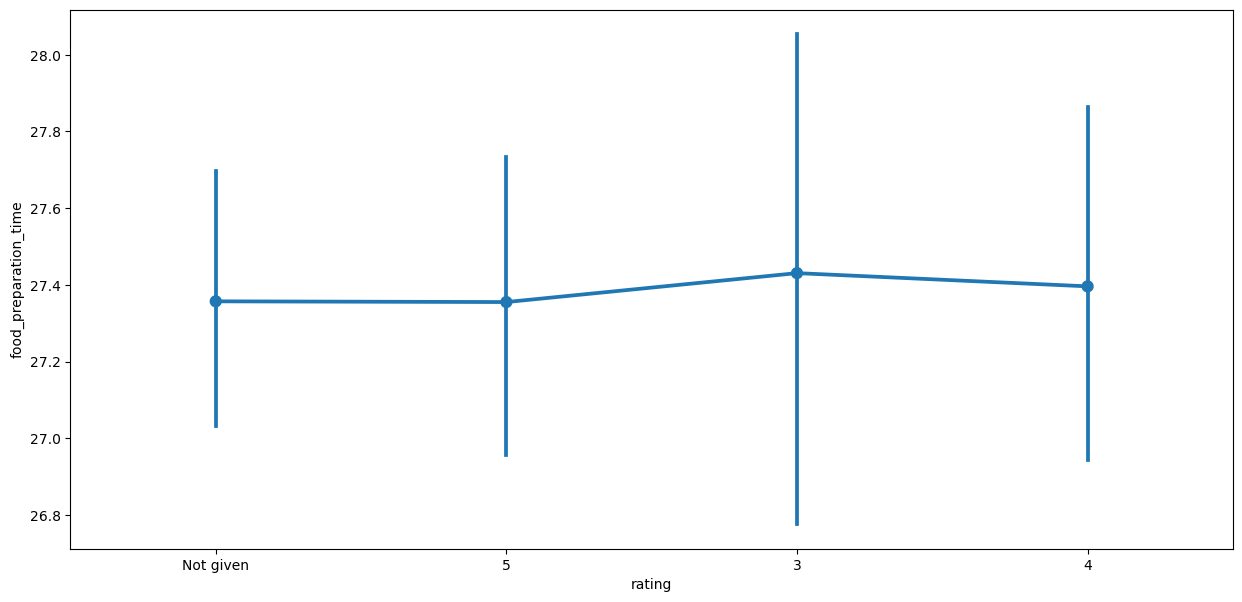

In [45]:
plt.figure(figsize=(15,7))
sns.pointplot(x="rating", y="food_preparation_time", data=df)
#plt.xticks(rotation=90)
plt.show()

#### Observation;
  *  Food preparation does not affect the rating .

#### Rating vs Delivey time

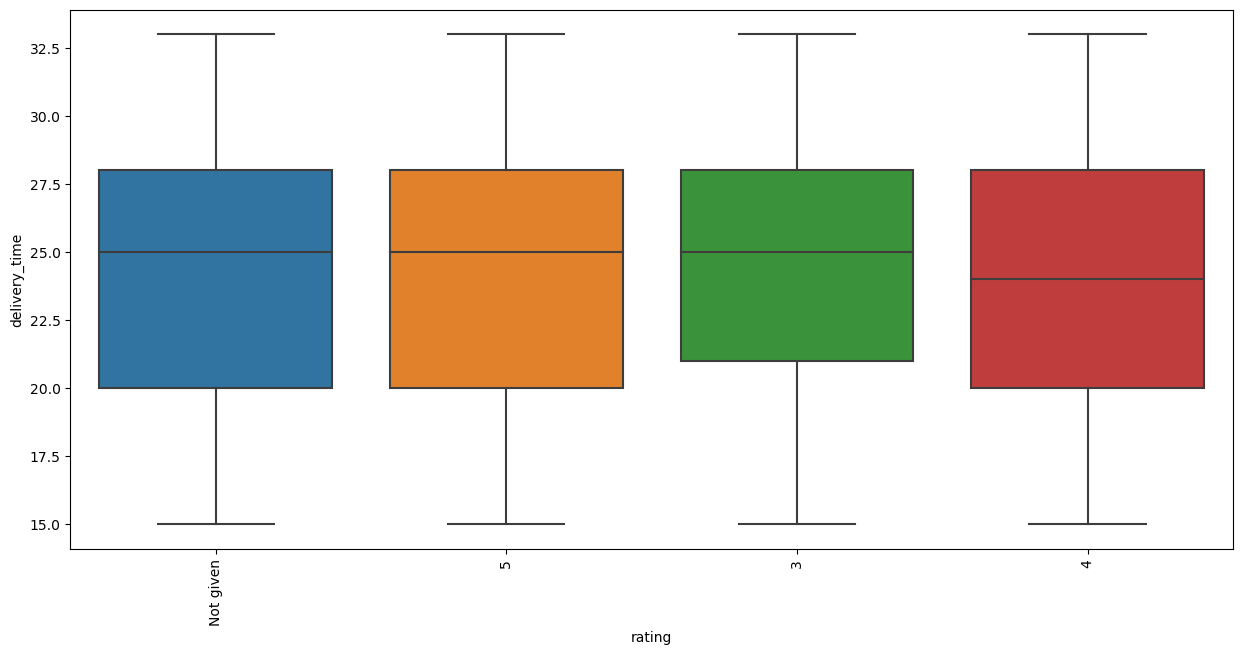

In [46]:
plt.figure(figsize=(15,7))
sns.boxplot(x="rating", y="delivery_time", data=df)
plt.xticks(rotation=90)
plt.show()

#### Observation:
  * Delivery time has no impact on rating.

#### Rating vs Cost of the order

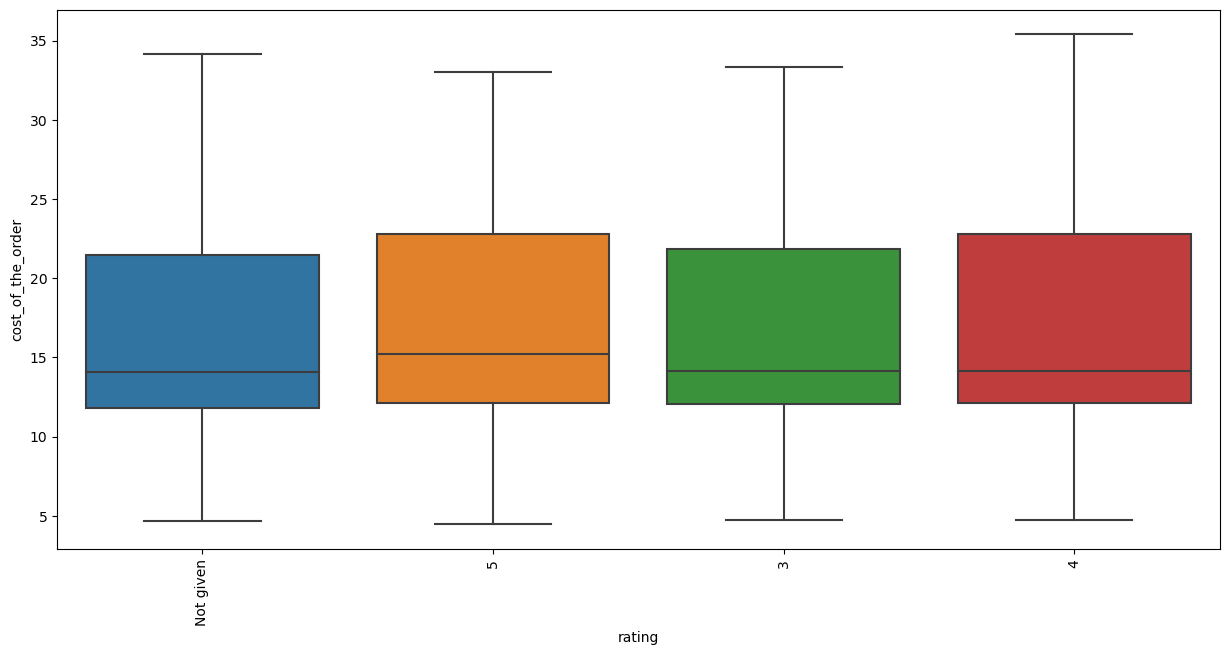

In [47]:
plt.figure(figsize=(15,7))
sns.boxplot(x="rating", y="cost_of_the_order", data=df)
plt.xticks(rotation=90)
plt.show()

#### Observation:
 *  Cost of the order does not impact the rating.

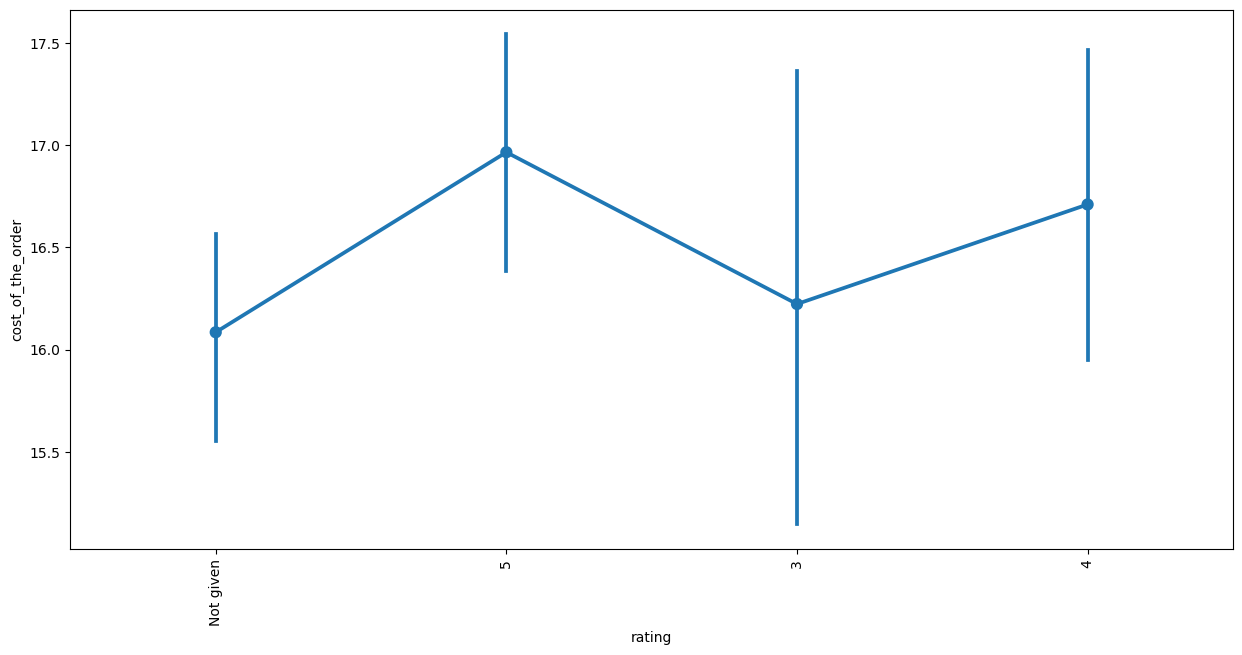

In [49]:
plt.figure(figsize=(15,7))
sns.pointplot(x="rating", y="cost_of_the_order", data=df)
plt.xticks(rotation=90)
plt.show()

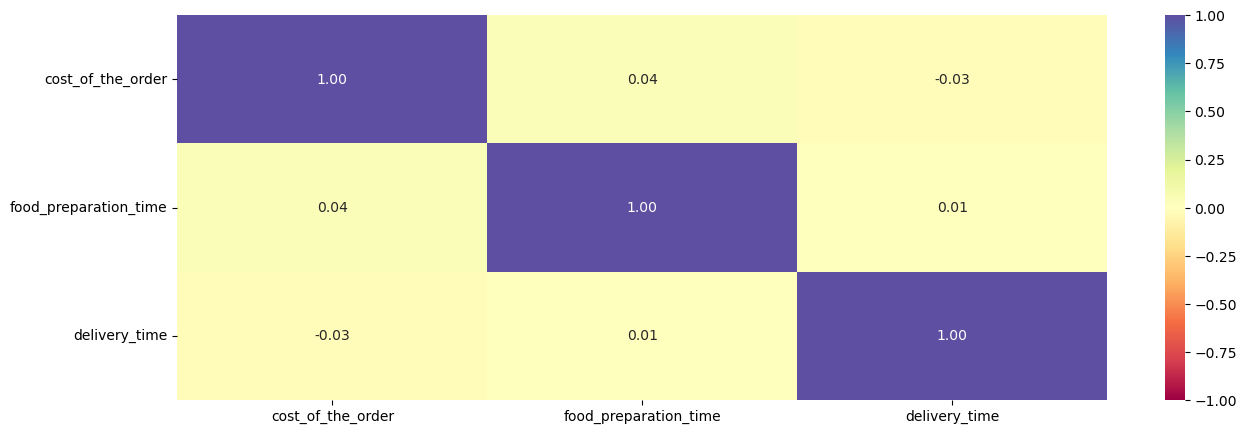

In [78]:
# check for the correlation among numerical variables
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
#plot the heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:  
   *  There does not seem to be strong relationship between delivery time and food preparation time. 
   

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [73]:
# Write the code here
 #Query the rating coloumn which doesn't have 'Not given' to find the rating count
df_rated = df[df['rating']!='Not given'].copy()
#Changing the rating coloumn to int
df_rated['rating']=df_rated['rating'].astype(int)
# Group by restarurent names and count the ratings
df_rating_count =df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending= False).reset_index()
# Find the top 5
df_rating_count.head(5)

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [33]:
# find the restaurents which has rating count greater than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()
# Group by restaurent name and rating
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending= False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
  * The restaurant which have average rating greater than 4 are the restaurant have higher rating count.
  * The Shack Shack restaurant has highest rating. 

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [54]:
# Write the code here
# if the order cost greater than 20, calculate 25%, if greater than 5 less than 20 then 15%, if less than 5 0
def rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0
# calculate the revenue
df['Revenue'] = df['cost_of_the_order'].apply(rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [57]:
# calculate the sum of the revenue
total_rev = df['Revenue'].sum() 
print('The net revenue is around', round(total_rev, 2), 'dollars')


The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [76]:
# Write the code here
# Calucate the total time which food preparation time + delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
# Calulate total time greater than 60
df_greater_than_60 = df[df['total_time']>60]


percentage = (df_greater_than_60.shape[0]/df.shape[0]) * 100
print("Percentage of orders take more than 60 minutes to get delivered from the time of order placed:", round(percentage, 2),'%')


Percentage of orders take more than 60 minutes to get delivered from the time of order placed: 10.54 %


#### Observations:
   * Only 10% of order took took more than 60 minutes for delivery.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [74]:
# Write the code here
# Find the mean delivery time for weekday and weekend.
mean_weekday_deltime = df[df['day_of_the_week']=='Weekday']['delivery_time'].mean()
mean_weekend_deltime = df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()
print('The mean delivery time of weekday is around', round(mean_weekday_deltime))
print('The mean delivery time of weekend is around', round(mean_weekend_deltime))

The mean delivery time of weekday is around 28
The mean delivery time of weekend is around 22


#### Observation:  
  * Delivery time of weekend is lesser than weekday.
  

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
   
   1. Shack Shack restaurant has highest rating.
   2. More orders are in the range of around 11-14 dollars.
   3. Delivery time of weekend is lesser than weekday.   
   4. The mean delivery time of weekdays and weekend is 24 minutes.  
   5. American cuisine is the most popular cuisine on weekends.  
   6. Shake Shack restaurant received highest number of orders.
   7. 39% orders are not rated.
   8. Food preparation time and cost of the order are not affecting the rating.

### Recommendations:

   1. American cuisine is most popular cuisine on weekends. we can give more American cuisine options so that we can expect           more orders.
   2. 39% orders are not rated. we need check if there any problem in the app for rating.
   3. Highest number of orders are  around 11 - 14 dollars. we need to increase the menu option between 11 -14 dollars.
   4. There are more orders on weekends, so restaurents should ensure they have sufficient inventory for orders.
   5. Shack Shack has the highest rating and highest number of orders. Other restaurents can more closely look at Shack Shack restaurent data and try to emulate it and increase their sales.
   

---